# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 4: Advanced Features - Model Selection

In [3]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')

n_samples = 3000

X = news.data[:n_samples]
y = news.target[:n_samples]

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Function to get stop words from a file
def get_stop_words(file_path):
    result = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file.readlines():
            result.add(line.strip())
    return result

# Ensure the stop words file exists
stop_words_file = 'stopwords_en.txt'
if not os.path.exists(stop_words_file):
    raise FileNotFoundError(f"The stop words file '{stop_words_file}' does not exist.")

stop_words = get_stop_words(stop_words_file)

# Create a text classification pipeline
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",  # Use r instead of ur
    )),
    ('nb', MultinomialNB(alpha=0.01)),
])

# Now clf can be used for training and predicting


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
import numpy as np

def evaluate_cross_validation(clf, X, y, K):
    # Create a KFold cross-validation iterator of K folds
    cv = KFold(n_splits=K, shuffle=True, random_state=0)
    # By default the score used is the one returned by the score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: {0:.3f} (+/- {1:.3f})".format(np.mean(scores), sem(scores)))

# Example usage (ensure clf, X, and y are defined before this):
# evaluate_cross_validation(clf, X, y, 5)


In [6]:
evaluate_cross_validation(clf, X, y, 3)

[ 0.812  0.808  0.822]
Mean score: 0.814 (+/-0.004)


In [23]:
def calc_params(X, y, clf, param_values, param_name, K):
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name: param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train_index, test_index) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train_index], y[train_index])
            k_train_scores[j] = clf.score(X[train_index], y[train_index])
            k_test_scores[j] = clf.score(X[test_index], y[test_index])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, alpha=0.4, lw=2, c='b', label='Training score')
    plt.semilogx(param_values, test_scores, alpha=0.4, lw=2, c='g', label='Testing score')
    
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.legend()
    plt.show()

    # return the training and testing scores on each parameter value
    return train_scores, test_scores


In [27]:
alphas = np.logspace(-7, 0, 8)
print (alphas)

[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


nb__alpha  =  0.001
nb__alpha  =  0.0027825594022071257
nb__alpha  =  0.007742636826811269
nb__alpha  =  0.021544346900318832
nb__alpha  =  0.05994842503189409
nb__alpha  =  0.1668100537200059
nb__alpha  =  0.46415888336127775
nb__alpha  =  1.2915496650148828
nb__alpha  =  3.593813663804626
nb__alpha  =  10.0


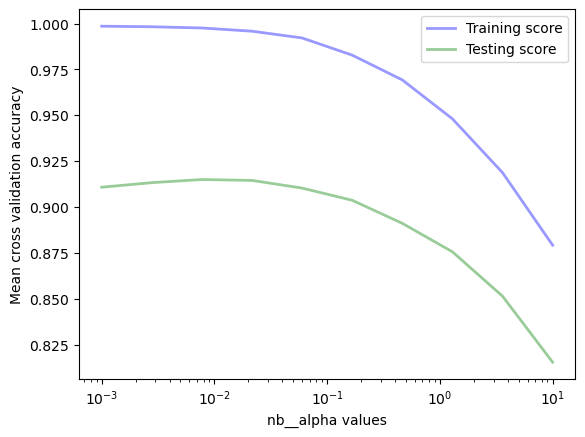

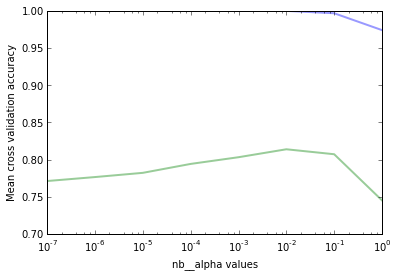

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

# Function to get stop words from a file
def get_stop_words(file_path):
    result = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file.readlines():
            result.add(line.strip())
    return result

# Ensure the stop words file exists
stop_words_file = 'stopwords_en.txt'
if not os.path.exists(stop_words_file):
    raise FileNotFoundError(f"The stop words file '{stop_words_file}' does not exist.")

stop_words = get_stop_words(stop_words_file)

# Define the text classification pipeline
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",
    )),
    ('nb', MultinomialNB()),
])

# Fetch some data (e.g., the 20 newsgroups dataset)
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

# Convert X to array form for compatibility with KFold
X = np.array(X)

# Define parameter values to test
alphas = np.logspace(-3, 1, 10)

# Function to calculate cross-validation scores for different parameter values
def calc_params(X, y, clf, param_values, param_name, K):
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name: param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train_index, test_index) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train_index], y[train_index])
            k_train_scores[j] = clf.score([X[k] for k in train_index], y[train_index])
            k_test_scores[j] = clf.score([X[k] for k in test_index], y[test_index])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, alpha=0.4, lw=2, c='b', label='Training score')
    plt.semilogx(param_values, test_scores, alpha=0.4, lw=2, c='g', label='Testing score')
    
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.legend()
    plt.show()

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

# Evaluate cross-validation scores for different alpha values in the MultinomialNB classifier
train_scores, test_scores = calc_params(X, y, clf, alphas, 'nb__alpha', 3)


In [32]:
print ('training scores: ', train_scores)
print ('testing scores: ', test_scores)

training scores:  [0.99856734 0.99824897 0.99758569 0.99583466 0.99214687 0.98278149
 0.9692773  0.94807917 0.9187626  0.87923167]
testing scores:  [0.91080335 0.91329725 0.91499522 0.91451767 0.9103258  0.90369309
 0.89111748 0.87562347 0.85142736 0.81545155]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

# Function to get stop words from a file
def get_stop_words(file_path):
    result = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file.readlines():
            result.add(line.strip())
    return result

# Ensure the stop words file exists
stop_words_file = 'stopwords_en.txt'
if not os.path.exists(stop_words_file):
    raise FileNotFoundError(f"The stop words file '{stop_words_file}' does not exist.")

stop_words = get_stop_words(stop_words_file)

# Define the text classification pipeline
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",  # Use r instead of ur
    )),
    ('svc', SVC()),
])

# Fetch some data (e.g., the 20 newsgroups dataset)
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

# Convert X to array form for compatibility with KFold
X = np.array(X)

# Define parameter values to test
Cs = np.logspace(-2, 2, 5)

# Function to calculate cross-validation scores for different parameter values
def calc_params(X, y, clf, param_values, param_name, K):
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name: param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train_index, test_index) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train_index], y[train_index])
            k_train_scores[j] = clf.score([X[k] for k in train_index], y[train_index])
            k_test_scores[j] = clf.score([X[k] for k in test_index], y[test_index])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, alpha=0.4, lw=2, c='b', label='Training score')
    plt.semilogx(param_values, test_scores, alpha=0.4, lw=2, c='g', label='Testing score')
    
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.legend()
    plt.show()

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

# Evaluate cross-validation scores for different C values in the SVC classifier
train_scores, test_scores = calc_params(X, y, clf, Cs, 'svc__C', 3)


svc__C  =  0.01


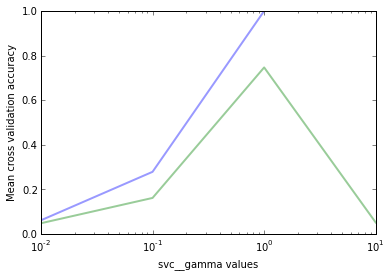

In [ ]:
gammas = np.logspace(-2, 1, 4)

train_scores, test_scores = calc_params(X, y, clf, gammas, 'svc__gamma', 3)

In [13]:
print ('training scores: ', train_scores)
print ('testing scores: ', test_scores)

training scores:  [ 0.06183333  0.279       0.99966667  1.        ]
testing scores:  [ 0.04866667  0.162       0.74666667  0.05166667]


For gamma < 1 we have underfitting. For gamma > 1 we have overfitting. So here, the best result is for gamma = 1 where we obtain a training an accuracy of 0.999 and a testing accuracy of 0.760

In [14]:
from sklearn.grid_search import GridSearchCV

parameters = {
    'svc__gamma': np.logspace(-2, 1, 4),
    'svc__C': np.logspace(-1, 1, 3),
}

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC()),
])

gs = GridSearchCV(clf, parameters, verbose=2, refit=False, cv=3)

In [15]:
%time _ = gs.fit(X, y)

gs.best_params_, gs.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[GridSearchCV] svc__gamma=0.01, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=0.1 -   8.7s


[GridSearchCV] svc__gamma=0.01, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=0.1 -   8.6s


[GridSearchCV] svc__gamma=0.01, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=0.1 -   8.7s


[GridSearchCV] svc__gamma=0.1, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=0.1 -   8.7s


[GridSearchCV] svc__gamma=0.1, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=0.1 -   8.8s


[GridSearchCV] svc__gamma=0.1, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=0.1 -   8.5s


[GridSearchCV] svc__gamma=1.0, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=0.1 -   8.8s


[GridSearchCV] svc__gamma=1.0, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=0.1 -   8.7s


[GridSearchCV] svc__gamma=1.0, svc__C=0.1 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=0.1 -   8.8s


[GridSearchCV] svc__gamma=10.0, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=0.1 -   9.0s


[GridSearchCV] svc__gamma=10.0, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=0.1 -   9.0s


[GridSearchCV] svc__gamma=10.0, svc__C=0.1 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=0.1 -   8.9s


[GridSearchCV] svc__gamma=0.01, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=1.0 -   8.8s


[GridSearchCV] svc__gamma=0.01, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=1.0 -   8.6s


[GridSearchCV] svc__gamma=0.01, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.01, svc__C=1.0 -   8.6s


[GridSearchCV] svc__gamma=0.1, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=1.0 -   8.7s


[GridSearchCV] svc__gamma=0.1, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=1.0 -   9.0s


[GridSearchCV] svc__gamma=0.1, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=0.1, svc__C=1.0 -   8.5s


[GridSearchCV] svc__gamma=1.0, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=1.0 -   9.0s


[GridSearchCV] svc__gamma=1.0, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=1.0 -   9.0s


[GridSearchCV] svc__gamma=1.0, svc__C=1.0 ......................................
[GridSearchCV] ............................. svc__gamma=1.0, svc__C=1.0 -   8.9s


[GridSearchCV] svc__gamma=10.0, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=1.0 -   9.4s


[GridSearchCV] svc__gamma=10.0, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=1.0 -   8.9s


[GridSearchCV] svc__gamma=10.0, svc__C=1.0 .....................................
[GridSearchCV] ............................ svc__gamma=10.0, svc__C=1.0 -   8.7s


[GridSearchCV] svc__gamma=0.01, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=0.01, svc__C=10.0 -   8.7s


[GridSearchCV] svc__gamma=0.01, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=0.01, svc__C=10.0 -   8.6s


[GridSearchCV] svc__gamma=0.01, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=0.01, svc__C=10.0 -   8.4s


[GridSearchCV] svc__gamma=0.1, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.1, svc__C=10.0 -   8.8s


[GridSearchCV] svc__gamma=0.1, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.1, svc__C=10.0 -   8.7s


[GridSearchCV] svc__gamma=0.1, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=0.1, svc__C=10.0 -   8.5s


[GridSearchCV] svc__gamma=1.0, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=1.0, svc__C=10.0 -   9.0s


[GridSearchCV] svc__gamma=1.0, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=1.0, svc__C=10.0 -   8.8s


[GridSearchCV] svc__gamma=1.0, svc__C=10.0 .....................................
[GridSearchCV] ............................ svc__gamma=1.0, svc__C=10.0 -   8.7s


[GridSearchCV] svc__gamma=10.0, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=10.0, svc__C=10.0 -   9.1s


[GridSearchCV] svc__gamma=10.0, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=10.0, svc__C=10.0 -   8.9s


[GridSearchCV] svc__gamma=10.0, svc__C=10.0 ....................................
[GridSearchCV] ........................... svc__gamma=10.0, svc__C=10.0 -   8.8s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.3min finished



CPU times: user 315.62 s, sys: 0.44 s, total: 316.06 s
Wall time: 316.89 s


({'svc__C': 10.0, 'svc__gamma': 0.10000000000000001}, 0.82799999999999996)

With the grid search we obtained a better combination of C and gamma parameters, for values 10.0 and 0.10 respectively, we obtained a 3-fold cross validation accuracy of 0.828 much better than the best value we obtained (0.76) in the previous experiment by only adjusting gamma and keeeping C value at 1.0.

We could continue trying to improve the results by also adjusting the vectorizer parameters in the grid search.

# Parallelizing

First we will declare a function that will persist all the K folds for the cross validation in different files. These files will be loaded by a process that will execute the corresponding fold:

In [16]:
from sklearn.externals import joblib
from sklearn.cross_validation import ShuffleSplit
import os

def persist_cv_splits(X, y, K=3, name='data', suffix="_cv_%03d.pkl"):
    """Dump K folds to filesystem."""
    
    cv_split_filenames = []
    
    # create KFold cross validation
    cv = KFold(n_samples, K, shuffle=True, random_state=0)
    
    # iterate over the K folds
    for i, (train, test) in enumerate(cv):
        cv_fold = ([X[k] for k in train], y[train], [X[k] for k in test], y[test])
        cv_split_filename = name + suffix % i
        cv_split_filename = os.path.abspath(cv_split_filename)
        joblib.dump(cv_fold, cv_split_filename)
        cv_split_filenames.append(cv_split_filename)
    
    return cv_split_filenames

In [17]:
cv_filenames = persist_cv_splits(X, y, name='news')

The following function loads a particular fold and fits the classifier with the specified parameters set. Finally returns the testing score. This function will be called bye each of the parallel processes:

In [18]:
def compute_evaluation(cv_split_filename, clf, params):
    
    # All module imports should be executed in the worker namespace
    from sklearn.externals import joblib

    # load the fold training and testing partitions from the filesystem
    X_train, y_train, X_test, y_test = joblib.load(
        cv_split_filename, mmap_mode='c')
    
    clf.set_params(**params)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    return test_score

This function executes the grid search in parallel processes. For each of the parameter combination (returned by the IterGrid iterator), it iterates over the K folds and creates a process to compute the evaluation. It returns the parameter combinations alongside with the tasks list: 

In [19]:
from sklearn.grid_search import IterGrid

def parallel_grid_search(lb_view, clf, cv_split_filenames, param_grid):
    
    all_tasks = []
    all_parameters = list(IterGrid(param_grid))
    
    # iterate over parameter combinations
    for i, params in enumerate(all_parameters):
        task_for_params = []
        
        # iterate over the K folds
        for j, cv_split_filename in enumerate(cv_split_filenames):    
            t = lb_view.apply(
                compute_evaluation, cv_split_filename, clf, params)
            task_for_params.append(t) 
        
        all_tasks.append(task_for_params)
        
    return all_parameters, all_tasks

In [21]:
from sklearn.svm import SVC
from IPython.parallel import Client

client = Client()
lb_view = client.load_balanced_view()

all_parameters, all_tasks = parallel_grid_search(
   lb_view, clf, cv_filenames, parameters)

/home/raul/envs/sklearn_book/lib/python2.7/site-packages/sklearn/grid_search.py:148: DeprecationWarning: IterGrid was renamed to ParameterGrid and will be removed in 0.15.
  " removed in 0.15.", DeprecationWarning)


In [22]:
def print_progress(tasks):
    progress = np.mean([task.ready() for task_group in tasks
                                 for task in task_group])
    print "Tasks completed: {0}%".format(100 * progress)

In [40]:
print_progress(all_tasks)

Tasks completed: 100.0%


In [41]:
def find_bests(all_parameters, all_tasks, n_top=5):
    """Compute the mean score of the completed tasks"""
    mean_scores = []
    
    for param, task_group in zip(all_parameters, all_tasks):
        scores = [t.get() for t in task_group if t.ready()]
        if len(scores) == 0:
            continue
        mean_scores.append((np.mean(scores), param))
                   
    return sorted(mean_scores, reverse=True)[:n_top]

In [42]:
print find_bests(all_parameters, all_tasks)

[(0.82633333333333336, {'svc__gamma': 0.10000000000000001, 'svc__C': 10.0}), (0.78866666666666674, {'svc__gamma': 1.0, 'svc__C': 10.0}), (0.7466666666666667, {'svc__gamma': 1.0, 'svc__C': 1.0}), (0.23333333333333336, {'svc__gamma': 0.01, 'svc__C': 10.0}), (0.16200000000000001, {'svc__gamma': 0.10000000000000001, 'svc__C': 1.0})]
